In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
P = "P_Solar[kW]"
IRR = "POA Irr[kW1m2]"

In [3]:
#Lendo dataframe utilizado no treinamento para calcular a média e desvio padrão
df_treinamento = pd.read_csv('Data/Solete/ML_Train.csv',index_col = 0, parse_dates=True)

In [4]:
# Lendo os dataframes do resultado do RF e também dos dados com falha para fazer a comparação das detecções de falhas
Results=pd.read_csv('Data/Solete/ML_Result.csv',index_col = 0, parse_dates=True)
DadosComFalha = pd.read_csv('Data/Solete/PorHoraComFalha.csv',index_col = 0, parse_dates=True)
frames = [Results,DadosComFalha]
df_concatenado = pd.concat(frames,axis=1)
df_concatenado.head()

,RF_Global,RF_Faixa1,RF_Faixa2,RF_Faixa3,OE_Global,OE_Faixa1,OE_Faixa2,OE_Faixa3,TEMPERATURE[degC],HUMIDITY[%],...,POA Irr[kW1m2],P_Gaia[kW],P_Solar[kW],Pressure[mbar],PR_A,Pac,Pdc,TempModule,TempCell,P/Pac
2018-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.956095,0.700000,...,0.056974,0.000671,0.316833,1016.824675,0.771259,0.432287,0.440659,16.430217,16.601139,0.732924
2018-06-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.359278,0.700000,...,0.074395,0.056381,0.457303,1016.921153,0.851619,0.559628,0.570467,18.238640,18.461825,0.817155
2018-06-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.266389,0.633500,...,0.143629,0.034202,0.981629,1016.602885,0.959274,1.058032,1.078524,21.879632,22.310520,0.927788
2018-06-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.064750,0.587972,...,0.342008,0.002903,2.350645,1016.332812,0.954127,2.435991,2.483171,28.717007,29.743032,0.964965
2018-06-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.713278,0.499583,...,0.538267,0.003948,3.661579,1016.145600,0.945578,3.704321,3.776067,35.266054,36.880854,0.988461


In [5]:
#Selecionando apenas a faixa de dados que contém resultados no RF
df2 = df_concatenado.dropna(subset=['RF_Global'])
df2.shape[0]

1406

In [6]:
#Limpando DF
df2.drop(columns=['TEMPERATURE[degC]','HUMIDITY[%]','WIND_SPEED[m1s]','WIND_DIR[deg]','GHI[kW1m2]','TempModule','TempCell','Pdc','P_Gaia[kW]'],inplace = True)
df2.head()

C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\2521321930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['TEMPERATURE[degC]','HUMIDITY[%]','WIND_SPEED[m1s]','WIND_DIR[deg]','GHI[kW1m2]','TempModule','TempCell','Pdc','P_Gaia[kW]'],inplace = True)


,RF_Global,RF_Faixa1,RF_Faixa2,RF_Faixa3,OE_Global,OE_Faixa1,OE_Faixa2,OE_Faixa3,POA Irr[kW1m2],P_Solar[kW],Pressure[mbar],PR_A,Pac,P/Pac
2019-05-19 11:00:00,2.795289,NaN,2.797350,NaN,2.787823,NaN,2.807651,NaN,0.398371,2.597761,1008.105079,0.907051,2.810923,0.924166
2019-05-19 12:00:00,4.065026,NaN,NaN,4.075506,4.088161,NaN,NaN,4.074804,0.598545,3.822858,1008.053324,0.890241,4.087444,0.935268
2019-05-19 13:00:00,4.776905,NaN,NaN,4.801335,4.846820,NaN,NaN,4.834758,0.724060,4.533689,1007.745077,0.870680,4.871560,0.930644
2019-05-19 14:00:00,2.952660,NaN,2.947115,NaN,2.909391,NaN,2.949166,NaN,0.419867,2.627058,1007.530023,0.880539,2.896391,0.907011
2019-05-19 15:00:00,2.804502,NaN,2.814194,NaN,2.807202,NaN,2.834475,NaN,0.403270,2.748606,1007.243416,0.946115,2.837841,0.968556


In [7]:
df2['P/RF_Global'] = df2[P].div(df2['RF_Global'].values)
df2['P/RF_Faixa1'] = df2[P].div(df2['RF_Faixa1'].values)
df2['P/RF_Faixa2'] = df2[P].div(df2['RF_Faixa2'].values)
df2['P/RF_Faixa3'] = df2[P].div(df2['RF_Faixa3'].values)
df2.head(5)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\138864574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['P/RF_Global'] = df2[P].div(df2['RF_Global'].values)
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\138864574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['P/RF_Faixa1'] = df2[P].div(df2['RF_Faixa1'].values)
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\138864574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,RF_Global,RF_Faixa1,RF_Faixa2,RF_Faixa3,OE_Global,OE_Faixa1,OE_Faixa2,OE_Faixa3,POA Irr[kW1m2],P_Solar[kW],Pressure[mbar],PR_A,Pac,P/Pac,P/RF_Global,P/RF_Faixa1,P/RF_Faixa2,P/RF_Faixa3
2019-05-19 11:00:00,2.795289,NaN,2.797350,NaN,2.787823,NaN,2.807651,NaN,0.398371,2.597761,1008.105079,0.907051,2.810923,0.924166,0.929335,NaN,0.928651,NaN
2019-05-19 12:00:00,4.065026,NaN,NaN,4.075506,4.088161,NaN,NaN,4.074804,0.598545,3.822858,1008.053324,0.890241,4.087444,0.935268,0.940426,NaN,NaN,0.938008
2019-05-19 13:00:00,4.776905,NaN,NaN,4.801335,4.846820,NaN,NaN,4.834758,0.724060,4.533689,1007.745077,0.870680,4.871560,0.930644,0.949085,NaN,NaN,0.944256
2019-05-19 14:00:00,2.952660,NaN,2.947115,NaN,2.909391,NaN,2.949166,NaN,0.419867,2.627058,1007.530023,0.880539,2.896391,0.907011,0.889726,NaN,0.891400,NaN
2019-05-19 15:00:00,2.804502,NaN,2.814194,NaN,2.807202,NaN,2.834475,NaN,0.403270,2.748606,1007.243416,0.946115,2.837841,0.968556,0.980069,NaN,0.976694,NaN


In [8]:
df2['P/OE_Global'] = df2[P].div(df2['OE_Global'].values)
df2['P/OE_Faixa1'] = df2[P].div(df2['OE_Faixa1'].values)
df2['P/OE_Faixa2'] = df2[P].div(df2['OE_Faixa2'].values)
df2['P/OE_Faixa3'] = df2[P].div(df2['OE_Faixa3'].values)
df2.head(10)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\4272322984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['P/OE_Global'] = df2[P].div(df2['OE_Global'].values)
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\4272322984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['P/OE_Faixa1'] = df2[P].div(df2['OE_Faixa1'].values)
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\4272322984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,RF_Global,RF_Faixa1,RF_Faixa2,RF_Faixa3,OE_Global,OE_Faixa1,OE_Faixa2,OE_Faixa3,POA Irr[kW1m2],P_Solar[kW],...,Pac,P/Pac,P/RF_Global,P/RF_Faixa1,P/RF_Faixa2,P/RF_Faixa3,P/OE_Global,P/OE_Faixa1,P/OE_Faixa2,P/OE_Faixa3
2019-05-19 11:00:00,2.795289,NaN,2.797350,NaN,2.787823,NaN,2.807651,NaN,0.398371,2.597761,...,2.810923,0.924166,0.929335,NaN,0.928651,NaN,0.931824,NaN,0.925243,NaN
2019-05-19 12:00:00,4.065026,NaN,NaN,4.075506,4.088161,NaN,NaN,4.074804,0.598545,3.822858,...,4.087444,0.935268,0.940426,NaN,NaN,0.938008,0.935104,NaN,NaN,0.938170
2019-05-19 13:00:00,4.776905,NaN,NaN,4.801335,4.846820,NaN,NaN,4.834758,0.724060,4.533689,...,4.871560,0.930644,0.949085,NaN,NaN,0.944256,0.935395,NaN,NaN,0.937728
2019-05-19 14:00:00,2.952660,NaN,2.947115,NaN,2.909391,NaN,2.949166,NaN,0.419867,2.627058,...,2.896391,0.907011,0.889726,NaN,0.891400,NaN,0.902958,NaN,0.890780,NaN
2019-05-19 15:00:00,2.804502,NaN,2.814194,NaN,2.807202,NaN,2.834475,NaN,0.403270,2.748606,...,2.837841,0.968556,0.980069,NaN,0.976694,NaN,0.979127,NaN,0.969706,NaN
2019-05-19 16:00:00,1.685335,1.689331,NaN,NaN,1.631714,1.686151,NaN,NaN,0.234177,1.621072,...,1.688379,0.960135,0.961869,0.959594,NaN,NaN,0.993478,0.961404,NaN,NaN
2019-05-19 17:00:00,0.676158,0.673727,NaN,NaN,0.661679,0.668532,NaN,NaN,0.098492,0.632810,...,0.724425,0.873534,0.935891,0.939267,NaN,NaN,0.956370,0.946565,NaN,NaN
2019-05-20 05:00:00,0.553172,0.558489,NaN,NaN,0.549930,0.546232,NaN,NaN,0.081347,0.507092,...,0.613708,0.826275,0.916699,0.907972,NaN,NaN,0.922103,0.928346,NaN,NaN
2019-05-20 06:00:00,0.577995,0.575019,NaN,NaN,0.577852,0.575595,NaN,NaN,0.085338,0.532989,...,0.642590,0.829439,0.922135,0.926907,NaN,NaN,0.922362,0.925978,NaN,NaN
2019-05-20 07:00:00,0.455601,0.457913,NaN,NaN,0.464182,0.458527,NaN,NaN,0.069638,0.427158,...,0.524610,0.814239,0.937571,0.932836,NaN,NaN,0.920237,0.931587,NaN,NaN


# Gráficos da faixa global

## Obtendo a média e desvio padrão

In [9]:
df_treinamento.head()

,TEMPERATURE[degC],HUMIDITY[%],POA Irr[kW1m2],Pac,TempModule,TempCell,GHI[kW1m2],P_Solar[kW],P/Pac,P/PacOE,P/PacRF
2018-06-01 04:00:00,14.956095,0.700000,0.056974,0.432287,16.430217,16.601139,0.137325,0.316833,0.732924,0.843383,0.974427
2018-06-01 05:00:00,16.359278,0.700000,0.074395,0.559628,18.238640,18.461825,0.225724,0.457303,0.817155,0.918620,0.981904
2018-06-01 06:00:00,18.266389,0.633500,0.143629,1.058032,21.879632,22.310520,0.344626,0.981629,0.927788,0.988415,0.992230
2018-06-01 07:00:00,20.064750,0.587972,0.342008,2.435991,28.717007,29.743032,0.451299,2.350645,0.964965,0.981233,0.991337
2018-06-01 08:00:00,21.713278,0.499583,0.538267,3.704321,35.266054,36.880854,0.540191,3.661579,0.988461,0.993457,1.000213


In [10]:
#Média e desvio padrão da faixa global
media_global_MF = df_treinamento['P/Pac'].mean()
dp_global_MF = df_treinamento['P/Pac'].std()

media_global_OE = df_treinamento['P/PacOE'].mean()
dp_global_OE = df_treinamento['P/PacOE'].std()

media_global_RF = df_treinamento['P/PacRF'].mean()
dp_global_RF = df_treinamento['P/PacRF'].std()



## Separando as "falhas" e "Não Falhas identificadas pela média desvio padrão

In [11]:
#MF
selecao_falhas_MF = (df2['P/Pac'] >= (media_global_MF + 3*dp_global_MF))  | (df2['P/Pac'] <= (media_global_MF - 3*dp_global_MF))
df2_MF_Global_F = df2[selecao_falhas_MF]
df2_MF_Global_NF = df2[~selecao_falhas_MF]

#RF
selecao_falhas_RF = (df2['P/RF_Global'] >= (media_global_OE + 3*dp_global_OE))  | (df2['P/RF_Global'] <= (media_global_OE - 3*dp_global_OE))
df2_RF_Global_F = df2[selecao_falhas_RF]
df2_RF_Global_NF = df2[~selecao_falhas_RF]

#OE
selecao_falhas_OE = (df2['P/OE_Global'] >= (media_global_OE + 3*dp_global_OE))  | (df2['P/OE_Global'] <= (media_global_OE - 3*dp_global_OE))
df2_OE_Global_F = df2[selecao_falhas_OE]
df2_OE_Global_NF = df2[~selecao_falhas_OE]


In [54]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = [10, 5]

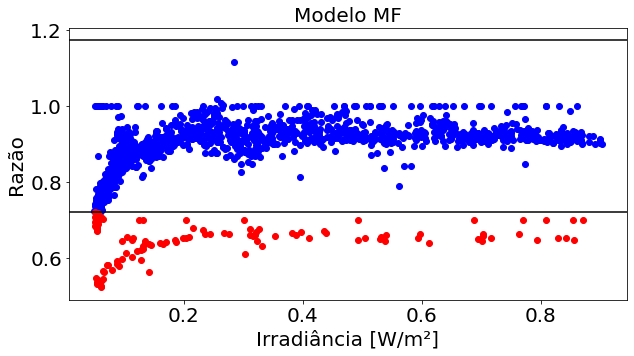

In [55]:
plt.rcParams["figure.figsize"] = [10, 5]
# Plotando a detecção de falhas usando a média e desvio padrão
plt.scatter(df2_MF_Global_NF[IRR],df2_MF_Global_NF['P/Pac'], color = 'blue')
plt.scatter(df2_MF_Global_F[IRR],df2_MF_Global_F['P/Pac'], color = 'red')
plt.axhline(y=(media_global_MF + 3*dp_global_MF), color='black', linestyle='-')
plt.axhline(y=(media_global_MF - 3*dp_global_MF), color='black', linestyle='-')
plt.title('Modelo MF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")

plt.savefig('images/resultadosMFdeteccaofaixaglobal.png', bbox_inches="tight")
plt.show()


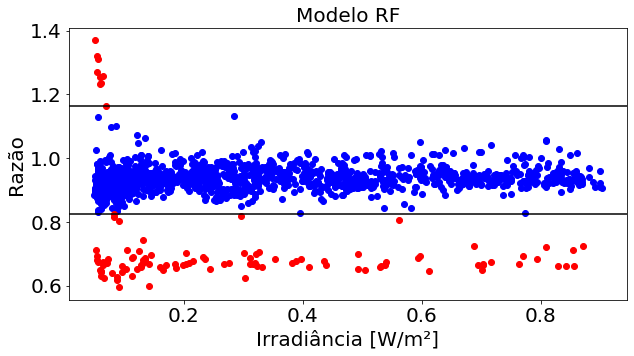

In [57]:
# Modelo RF
plt.rcParams["figure.figsize"] = [10, 5]
plt.scatter(df2_RF_Global_NF[IRR],df2_RF_Global_NF['P/RF_Global'], color = 'blue')
plt.scatter(df2_RF_Global_F[IRR],df2_RF_Global_F['P/RF_Global'], color = 'red')
plt.axhline(y=(media_global_OE + 3*dp_global_OE), color='black', linestyle='-')
plt.axhline(y=(media_global_OE - 3*dp_global_OE), color='black', linestyle='-')
plt.title('Modelo RF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosRFdeteccaofaixaglobal.png', bbox_inches="tight")
plt.show()

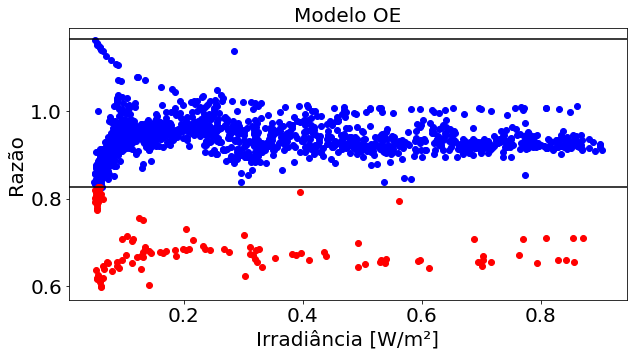

In [58]:
# Modelo OE
plt.rcParams["figure.figsize"] = [10, 5]
plt.scatter(df2_OE_Global_NF[IRR],df2_OE_Global_NF['P/OE_Global'], color = 'blue')
plt.scatter(df2_OE_Global_F[IRR],df2_OE_Global_F['P/OE_Global'], color = 'red')
plt.axhline(y=(media_global_OE + 3*dp_global_OE), color='black', linestyle='-')
plt.axhline(y=(media_global_OE - 3*dp_global_OE), color='black', linestyle='-')
plt.title('Modelo OE', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosOEdeteccaofaixaglobal.png', bbox_inches="tight")
plt.show()

## Printando apenas as falhas observadas na "detecção visual" (previamente conhecidas)

In [59]:
a, b = np.polyfit(df_treinamento[IRR], df_treinamento[P], 1) #Encontrando a melhor fit line (R²) entre os dois valores
limite_sup = 0.1 #Atribuindo um valor de 0.5kW acima e abaixo da fit line para valores de falha (df_5.index >= "2019-06-10 00:00:00") & (df_5.index <= "2019-06-16 23:59:59")
limite_inf = 0.1
selecao_erros = (df2[P] > (a+2)*df2[IRR]+b + limite_sup) | (df2[P] < (a-1.5)*df2[IRR]+b - limite_inf) | (df2.index >= "2019-06-10 00:00:00") & (df2.index <= "2019-06-16 23:59:59")

df_global_f_conhecidas = df2[selecao_erros]
df_global_nf_conhecidas = df2[~selecao_erros] 

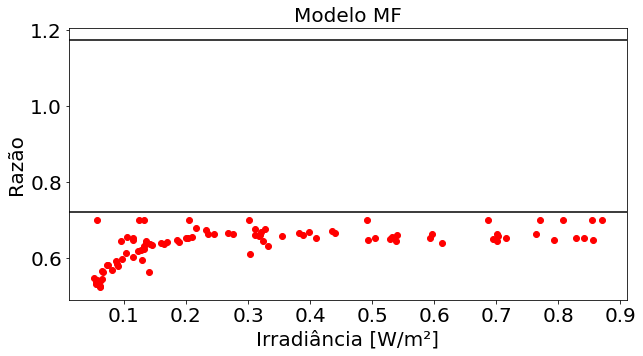

In [60]:

plt.rcParams["figure.figsize"] = [10, 5]
plt.scatter(df_global_f_conhecidas[IRR],df_global_f_conhecidas['P/Pac'], color = 'red')
plt.axhline(y=(media_global_MF + 3*dp_global_MF), color='black', linestyle='-')
plt.axhline(y=(media_global_MF - 3*dp_global_MF), color='black', linestyle='-')
plt.title('Modelo MF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosMFfalhasfg.png', bbox_inches="tight")
plt.show()


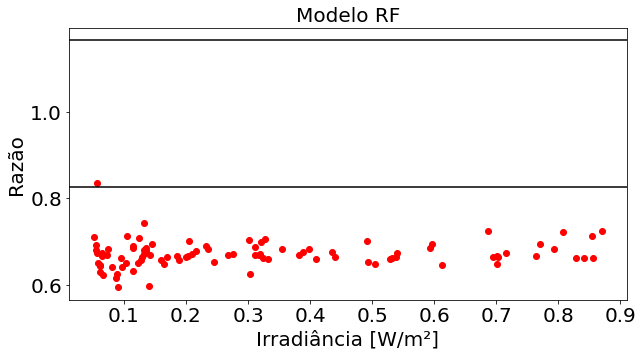

In [61]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.scatter(df_global_f_conhecidas[IRR],df_global_f_conhecidas['P/RF_Global'], color = 'red')
plt.axhline(y=(media_global_OE + 3*dp_global_OE), color='black', linestyle='-')
plt.axhline(y=(media_global_OE - 3*dp_global_OE), color='black', linestyle='-')
plt.title('Modelo RF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosRFfalhasfg.png', bbox_inches="tight")
plt.show()

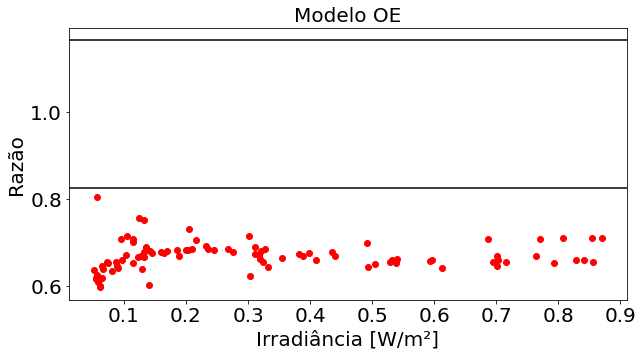

In [62]:
plt.scatter(df_global_f_conhecidas[IRR],df_global_f_conhecidas['P/OE_Global'], color = 'red')
plt.axhline(y=(media_global_OE + 3*dp_global_OE), color='black', linestyle='-')
plt.axhline(y=(media_global_OE - 3*dp_global_OE), color='black', linestyle='-')
plt.title('Modelo OE', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosOEfalhasfg.png', bbox_inches="tight")
plt.show()

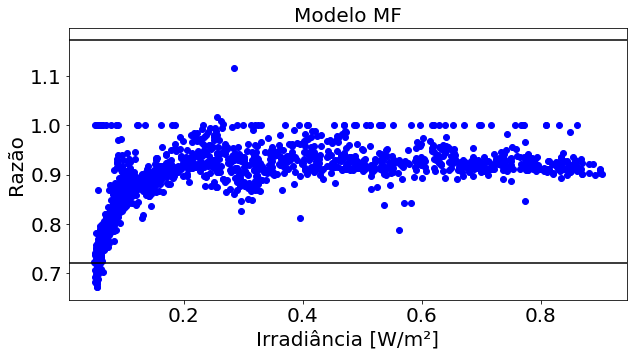

In [63]:

plt.scatter(df_global_nf_conhecidas[IRR],df_global_nf_conhecidas['P/Pac'], color = 'blue')
plt.axhline(y=(media_global_MF + 3*dp_global_MF), color='black', linestyle='-')
plt.axhline(y=(media_global_MF - 3*dp_global_MF), color='black', linestyle='-')
plt.title('Modelo MF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosMFnaofalhasfg.png', bbox_inches="tight")
plt.show()

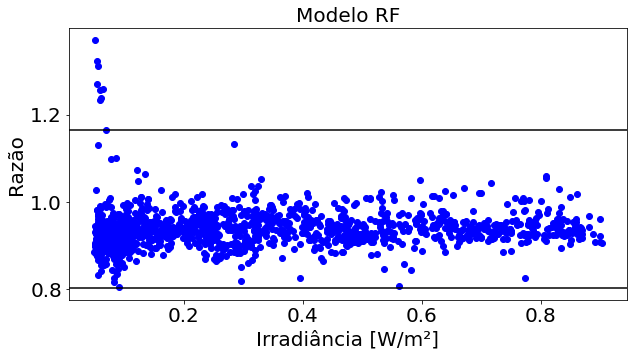

In [64]:
plt.scatter(df_global_nf_conhecidas[IRR],df_global_nf_conhecidas['P/RF_Global'], color = 'blue')
plt.axhline(y=(media_global_OE + 3*dp_global_OE), color='black', linestyle='-')
plt.axhline(y=(media_global_OE - 3.4*dp_global_OE), color='black', linestyle='-')
plt.title('Modelo RF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosRFnaofalhasfg.png', bbox_inches="tight")
plt.show()

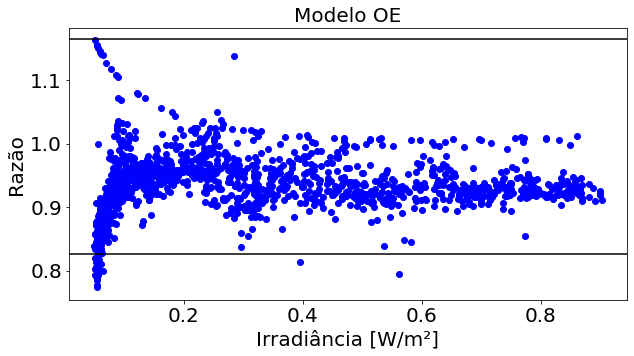

In [65]:
plt.scatter(df_global_nf_conhecidas[IRR],df_global_nf_conhecidas['P/OE_Global'], color = 'blue')
plt.axhline(y=(media_global_OE + 3*dp_global_OE), color='black', linestyle='-')
plt.axhline(y=(media_global_OE - 3*dp_global_OE), color='black', linestyle='-')
plt.title('Modelo OE', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosOEnaofalhasfg.png', bbox_inches="tight")
plt.show()

### Falsos positivos e falsos negativos no modelo global

In [66]:
# Falsos negativos
fn_mf_global = df_global_f_conhecidas[(df_global_f_conhecidas['P/Pac'] > (media_global_MF - 3*dp_global_MF)) & (df_global_f_conhecidas['P/Pac'] < (media_global_MF + 3*dp_global_MF))].shape[0]
fn_rf_global = df_global_f_conhecidas[(df_global_f_conhecidas['P/RF_Global'] > (media_global_OE - 3.4*dp_global_OE)) & (df_global_f_conhecidas['P/RF_Global'] < (media_global_OE + 3*dp_global_OE))].shape[0]
fn_oe_global = df_global_f_conhecidas[(df_global_f_conhecidas['P/OE_Global'] > (media_global_OE - 3*dp_global_OE)) & (df_global_f_conhecidas['P/OE_Global'] < (media_global_OE + 3*dp_global_OE))].shape[0]

#Falsos positivos
fp_mf_global = df_global_nf_conhecidas[(df_global_nf_conhecidas['P/Pac'] <= (media_global_MF - 3*dp_global_MF)) | (df_global_nf_conhecidas['P/Pac'] >= (media_global_MF + 3*dp_global_MF))].shape[0]
fp_rf_global = df_global_nf_conhecidas[(df_global_nf_conhecidas['P/RF_Global'] <= (media_global_OE - 3.4*dp_global_OE)) | (df_global_nf_conhecidas['P/RF_Global'] >= (media_global_OE + 3*dp_global_OE))].shape[0]
fp_oe_global = df_global_nf_conhecidas[(df_global_nf_conhecidas['P/OE_Global'] <= (media_global_OE - 3*dp_global_OE)) | (df_global_nf_conhecidas['P/OE_Global'] >= (media_global_OE + 3*dp_global_OE))].shape[0]

#Verdadeiros negativos
tn_mf_global = df_global_f_conhecidas[~((df_global_f_conhecidas['P/Pac'] > (media_global_MF - 3*dp_global_MF)) & (df_global_f_conhecidas['P/Pac'] < (media_global_MF + 3*dp_global_MF)))].shape[0]
tn_rf_global = df_global_f_conhecidas[~((df_global_f_conhecidas['P/RF_Global'] > (media_global_OE - 3.4*dp_global_OE)) & (df_global_f_conhecidas['P/RF_Global'] < (media_global_OE + 3*dp_global_OE)))].shape[0]
tn_oe_global = df_global_f_conhecidas[~((df_global_f_conhecidas['P/OE_Global'] > (media_global_OE - 3*dp_global_OE)) & (df_global_f_conhecidas['P/OE_Global'] < (media_global_OE + 3*dp_global_OE)))].shape[0]

#Verdadeiros positivos
tp_mf_global = df_global_nf_conhecidas[~((df_global_nf_conhecidas['P/Pac'] <= (media_global_MF - 3*dp_global_MF)) | (df_global_nf_conhecidas['P/Pac'] >= (media_global_MF + 3*dp_global_MF)))].shape[0]
tp_rf_global = df_global_nf_conhecidas[~((df_global_nf_conhecidas['P/RF_Global'] <= (media_global_OE - 3.4*dp_global_OE)) | (df_global_nf_conhecidas['P/RF_Global'] >= (media_global_OE + 3*dp_global_OE)))].shape[0]
tp_oe_global = df_global_nf_conhecidas[~((df_global_nf_conhecidas['P/OE_Global'] <= (media_global_OE - 3*dp_global_OE)) | (df_global_nf_conhecidas['P/OE_Global'] >= (media_global_OE + 3*dp_global_OE)))].shape[0]



print("Falso negativos MF = ",fn_mf_global, "Falsos positivos MF = ",fp_mf_global, 'TN MF = ', tn_mf_global, 'TP MF = ', tp_mf_global)
print("Falso negativos RF = ",fn_rf_global, "Falsos positivos RF = ",fp_rf_global, 'TN RF = ', tn_rf_global, 'TP RF = ', tp_rf_global)
print("Falso negativos OE = ",fn_oe_global, "Falsos positivos OE = ",fp_oe_global, 'TN OE = ', tn_oe_global, 'TP OE = ', tp_oe_global)

Falso negativos MF =  0 Falsos positivos MF =  25 TN MF =  94 TP MF =  1287
Falso negativos RF =  1 Falsos positivos RF =  9 TN RF =  93 TP RF =  1303
Falso negativos OE =  0 Falsos positivos OE =  27 TN OE =  94 TP OE =  1285


In [67]:
# Modelo MF faixa global
# Precisão
mf_fg_precision = tp_mf_global / (tp_mf_global + fp_mf_global) * 100
#Acurácia
mf_fg_acurracy = (tp_mf_global + tn_mf_global) / (tp_mf_global + tn_mf_global + fp_mf_global + fn_mf_global) * 100
#Especificidade
mf_fg_especi = tn_mf_global / (tn_mf_global + fp_mf_global) * 100
#Recall
mf_fg_recall = tp_mf_global / (tp_mf_global + fn_mf_global) * 100

print('Modelo MF na faixa global teve:')
print('Precisão = ', mf_fg_precision)
print('Acurácia = ', mf_fg_acurracy)
print('Especificidade = ', mf_fg_especi)
print('Recall = ', mf_fg_recall)


Modelo MF na faixa global teve:
Precisão =  98.09451219512195
Acurácia =  98.22190611664296
Especificidade =  78.99159663865547
Recall =  100.0


In [68]:
# Modelo OE faixa global
# Precisão
oe_fg_precision = tp_oe_global / (tp_oe_global + fp_oe_global) * 100
#Acurácia
oe_fg_acurracy = (tp_oe_global + tn_oe_global) / (tp_oe_global + tn_oe_global + fp_oe_global + fn_oe_global) * 100
#Especificidade
oe_fg_especi = tn_oe_global / (tn_oe_global + fp_oe_global) * 100
#Recall
oe_fg_recall = tp_oe_global / (tp_oe_global + fn_oe_global) * 100

print('Modelo OE na faixa global teve:')
print('Precisão = ', oe_fg_precision)
print('Acurácia = ', oe_fg_acurracy)
print('Especificidade = ', oe_fg_especi)
print('Recall = ', oe_fg_recall)

Modelo OE na faixa global teve:
Precisão =  97.9420731707317
Acurácia =  98.0796586059744
Especificidade =  77.68595041322314
Recall =  100.0


In [69]:
# Modelo RF faixa global
# Precisão
rf_fg_precision = tp_rf_global / (tp_rf_global + fp_rf_global) * 100
#Acurácia
rf_fg_acurracy = (tp_rf_global + tn_rf_global) / (tp_rf_global + tn_rf_global + fp_rf_global + fn_rf_global) * 100
#Especificidade
rf_fg_especi = tn_rf_global / (tn_rf_global + fp_rf_global) * 100
#Recall
rf_fg_recall = tp_rf_global / (tp_rf_global + fn_rf_global) * 100

print('Modelo RF na faixa global teve:')
print('Precisão = ', rf_fg_precision)
print('Acurácia = ', rf_fg_acurracy)
print('Especificidade = ', rf_fg_especi)
print('Recall = ', rf_fg_recall)

Modelo RF na faixa global teve:
Precisão =  99.3140243902439
Acurácia =  99.28876244665719
Especificidade =  91.17647058823529
Recall =  99.92331288343557


# Visualizando por faixa de irradiação

In [70]:
# Separando por faixas tanto df2 quanto o df_treinamento
selecao_faixa1 = (df2[IRR] >= 50/1000) & (df2[IRR] <= 250/1000)
selecao_faixa2 = (df2[IRR] > 250/1000) & (df2[IRR] <= 500/1000)
selecao_faixa3 = (df2[IRR] > 500/1000)

df2_faixa1 = df2[selecao_faixa1]
df2_faixa2 = df2[selecao_faixa2]
df2_faixa3 = df2[selecao_faixa3]

selecao_faixa1_treinamento = (df_treinamento[IRR] >= 50/1000) & (df_treinamento[IRR] <= 250/1000)
selecao_faixa2_treinamento = (df_treinamento[IRR] > 250/1000) & (df_treinamento[IRR] <= 500/1000)
selecao_faixa3_treinamento = (df_treinamento[IRR] > 500/1000)

df_treinamento_faixa1 = df_treinamento[selecao_faixa1_treinamento]
df_treinamento_faixa2 = df_treinamento[selecao_faixa2_treinamento]
df_treinamento_faixa3 = df_treinamento[selecao_faixa3_treinamento]

## Faixa 1 (50-250)

In [71]:
# Médias e desvio padrões
media_faixa1_MF = df_treinamento_faixa1['P/Pac'].mean()
dp_faixa1_MF = df_treinamento_faixa1['P/Pac'].std()

media_faixa1_OE = df_treinamento_faixa1['P/PacOE'].mean()
dp_faixa1_OE = df_treinamento_faixa1['P/PacOE'].std()

In [72]:
#MF
selecao_falhas = (df2_faixa1['P/Pac'] >= (media_faixa1_MF + 3*dp_faixa1_MF))  | (df2['P/Pac'] <= (media_faixa1_MF - 3*dp_faixa1_MF))
df2_MF_faixa1_F = df2_faixa1[selecao_falhas]
df2_MF_faixa1_NF = df2_faixa1[~selecao_falhas]

#RF
selecao_falhas2 = (df2_faixa1['P/RF_Faixa1'] >= (media_faixa1_OE + 3*dp_faixa1_OE))  | (df2['P/RF_Faixa1'] <= (media_faixa1_OE - 3*dp_faixa1_OE))
df2_RF_faixa1_F = df2_faixa1[selecao_falhas2]
df2_RF_faixa1_NF = df2_faixa1[~selecao_falhas2]

#OE
selecao_falhas2 = (df2_faixa1['P/OE_Faixa1'] >= (media_faixa1_OE + 3*dp_faixa1_OE))  | (df2['P/OE_Faixa1'] <= (media_faixa1_OE - 3*dp_faixa1_OE))
df2_OE_faixa1_F = df2_faixa1[selecao_falhas2]
df2_OE_faixa1_NF = df2_faixa1[~selecao_falhas2]

C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\3993481633.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_MF_faixa1_F = df2_faixa1[selecao_falhas]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\3993481633.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_MF_faixa1_NF = df2_faixa1[~selecao_falhas]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\3993481633.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_RF_faixa1_F = df2_faixa1[selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\3993481633.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_RF_faixa1_NF = df2_faixa1[~selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\3993481633.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_OE_faixa1_F = df2_faixa1[selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_975

In [73]:
a, b = np.polyfit(df_treinamento_faixa1[IRR],df_treinamento_faixa1[P], 1) #Encontrando a melhor fit line (R²) entre os dois valores
limite_sup = 0.1 #Atribuindo um valor de 0.5kW acima e abaixo da fit line para valores de falha (df_5.index >= "2019-06-10 00:00:00") & (df_5.index <= "2019-06-16 23:59:59")
limite_inf = 0.1
selecao_erros = (df2_faixa1[P] > (a+2)*df2_faixa1[IRR]+b + limite_sup) | (df2_faixa1[P] < (a-1.5)*df2_faixa1[IRR]+b - limite_inf) | (df2_faixa1.index >= "2019-06-10 00:00:00") & (df2_faixa1.index <= "2019-06-16 23:59:59")

df_faixa1_f_conhecidas = df2_faixa1[selecao_erros]
df_faixa1_nf_conhecidas = df2_faixa1[~selecao_erros] 

### Calculando falsos positivos ( um valor normal identificada como falha) e falsos negativos ( uma falha identificada como valor normal)

In [74]:
# Falsos negativos
fn_mf_faixa1 = df_faixa1_f_conhecidas[(df_faixa1_f_conhecidas['P/Pac'] > (media_faixa1_MF - 3*dp_faixa1_MF)) & (df_faixa1_f_conhecidas['P/Pac'] < (media_faixa1_MF + 3*dp_faixa1_MF))].shape[0]
fn_rf_faixa1 = df_faixa1_f_conhecidas[(df_faixa1_f_conhecidas['P/RF_Faixa1'] > (media_faixa1_OE - 3*dp_faixa1_OE)) & (df_faixa1_f_conhecidas['P/RF_Faixa1'] < (media_faixa1_OE + 3*dp_faixa1_OE))].shape[0]
fn_oe_faixa1 = df_faixa1_f_conhecidas[(df_faixa1_f_conhecidas['P/OE_Faixa1'] > (media_faixa1_OE - 3*dp_faixa1_OE)) & (df_faixa1_f_conhecidas['P/OE_Faixa1'] < (media_faixa1_OE + 3*dp_faixa1_OE))].shape[0]

#FP
fp_mf_faixa1 = df_faixa1_nf_conhecidas[(df_faixa1_nf_conhecidas['P/Pac'] <= (media_faixa1_MF - 3*dp_faixa1_MF)) | (df_faixa1_nf_conhecidas['P/Pac'] >= (media_faixa1_MF + 3*dp_faixa1_MF))].shape[0]
fp_rf_faixa1 = df_faixa1_nf_conhecidas[(df_faixa1_nf_conhecidas['P/RF_Faixa1'] <= (media_faixa1_OE - 3*dp_faixa1_OE)) | (df_faixa1_nf_conhecidas['P/RF_Faixa1'] >= (media_faixa1_OE + 3*dp_faixa1_OE))].shape[0]
fp_oe_faixa1 = df_faixa1_nf_conhecidas[(df_faixa1_nf_conhecidas['P/OE_Faixa1'] <= (media_faixa1_OE - 3*dp_faixa1_OE)) | (df_faixa1_nf_conhecidas['P/OE_Faixa1'] >= (media_faixa1_OE + 3*dp_faixa1_OE))].shape[0]

#Verdadeiros negativos
tn_mf_faixa1 = df_faixa1_f_conhecidas[~((df_faixa1_f_conhecidas['P/Pac'] > (media_faixa1_MF - 3*dp_faixa1_MF)) & (df_faixa1_f_conhecidas['P/Pac'] < (media_faixa1_MF + 3*dp_faixa1_MF)))].shape[0]
tn_rf_faixa1 = df_faixa1_f_conhecidas[~((df_faixa1_f_conhecidas['P/RF_Faixa1'] > (media_faixa1_OE - 3*dp_faixa1_OE)) & (df_faixa1_f_conhecidas['P/RF_Faixa1'] < (media_faixa1_OE + 3*dp_faixa1_OE)))].shape[0]
tn_oe_faixa1 = df_faixa1_f_conhecidas[~((df_faixa1_f_conhecidas['P/OE_Faixa1'] > (media_faixa1_OE - 3*dp_faixa1_OE)) & (df_faixa1_f_conhecidas['P/OE_Faixa1'] < (media_faixa1_OE + 3*dp_faixa1_OE)))].shape[0]

#Verdadeiros positivos
tp_mf_faixa1 = df_faixa1_nf_conhecidas[~((df_faixa1_nf_conhecidas['P/Pac'] <= (media_faixa1_MF - 3*dp_faixa1_MF)) | (df_faixa1_nf_conhecidas['P/Pac'] >= (media_faixa1_MF + 3*dp_faixa1_MF)))].shape[0]
tp_rf_faixa1 = df_faixa1_nf_conhecidas[~((df_faixa1_nf_conhecidas['P/RF_Faixa1'] <= (media_faixa1_OE - 3*dp_faixa1_OE)) | (df_faixa1_nf_conhecidas['P/RF_Faixa1'] >= (media_faixa1_OE + 3*dp_faixa1_OE)))].shape[0]
tp_oe_faixa1 = df_faixa1_nf_conhecidas[~((df_faixa1_nf_conhecidas['P/OE_Faixa1'] <= (media_faixa1_OE - 3*dp_faixa1_OE)) | (df_faixa1_nf_conhecidas['P/OE_Faixa1'] >= (media_faixa1_OE + 3*dp_faixa1_OE)))].shape[0]


#Mostrando os resultados
print("__________FAIXA 1__________")
print("FN MF = ",fn_mf_faixa1, "FP MF = ",fp_mf_faixa1, "TN MF = ",tn_mf_faixa1 ,"TP MF = ",tp_mf_faixa1)
print("FN RF = ",fn_rf_faixa1, "FP RF = ",fp_rf_faixa1)
print("FN OE = ",fn_oe_faixa1, "FP OE = ",fp_oe_faixa1)

__________FAIXA 1__________
FN MF =  6 FP MF =  0 TN MF =  44 TP MF =  633
FN RF =  1 FP RF =  9
FN OE =  1 FP OE =  2


## Faixa 2 (250-500)

In [75]:
media_faixa2_MF = df_treinamento_faixa2['P/Pac'].mean()
dp_faixa2_MF = df_treinamento_faixa2['P/Pac'].std()

media_faixa2_OE = df_treinamento_faixa2['P/PacOE'].mean()
dp_faixa2_OE = df_treinamento_faixa2['P/PacOE'].std()

In [76]:
#MF
selecao_falhas = (df2_faixa2['P/Pac'] >= (media_faixa2_MF + 3*dp_faixa2_MF))  | (df2['P/Pac'] <= (media_faixa2_MF - 3*dp_faixa2_MF))
df2_MF_faixa2_F = df2_faixa2[selecao_falhas]
df2_MF_faixa2_NF = df2_faixa2[~selecao_falhas]

#RF
selecao_falhas2 = (df2_faixa2['P/RF_Faixa2'] >= (media_faixa2_OE + 3*dp_faixa2_OE))  | (df2['P/RF_Faixa2'] <= (media_faixa2_OE - 3*dp_faixa2_OE))
df2_RF_faixa2_F = df2_faixa2[selecao_falhas2]
df2_RF_faixa2_NF = df2_faixa2[~selecao_falhas2]

#OE
selecao_falhas2 = (df2_faixa2['P/OE_Faixa2'] >= (media_faixa2_OE + 3*dp_faixa2_OE))  | (df2['P/OE_Faixa2'] <= (media_faixa2_OE - 3*dp_faixa2_OE))
df2_OE_faixa2_F = df2_faixa2[selecao_falhas2]
df2_OE_faixa2_NF = df2_faixa2[~selecao_falhas2]

C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\1630979979.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_MF_faixa2_F = df2_faixa2[selecao_falhas]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\1630979979.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_MF_faixa2_NF = df2_faixa2[~selecao_falhas]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\1630979979.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_RF_faixa2_F = df2_faixa2[selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\1630979979.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_RF_faixa2_NF = df2_faixa2[~selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\1630979979.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_OE_faixa2_F = df2_faixa2[selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_975

In [77]:
a, b = np.polyfit(df_treinamento_faixa2[IRR],df_treinamento_faixa2[P], 1) #Encontrando a melhor fit line (R²) entre os dois valores
limite_sup = 0.1 #Atribuindo um valor de 0.5kW acima e abaixo da fit line para valores de falha (df_5.index >= "2019-06-10 00:00:00") & (df_5.index <= "2019-06-16 23:59:59")
limite_inf = 0.1
selecao_erros = (df2_faixa2[P] > (a+2)*df2_faixa2[IRR]+b + limite_sup) | (df2_faixa2[P] < (a-1.5)*df2_faixa2[IRR]+b - limite_inf) | (df2_faixa2.index >= "2019-06-10 00:00:00") & (df2_faixa2.index <= "2019-06-16 23:59:59")

df_faixa2_f_conhecidas = df2_faixa2[selecao_erros]
df_faixa2_nf_conhecidas = df2_faixa2[~selecao_erros] 

### Falsos positivos (valor normal detectado como falha) e falsos negavitos (valor falha identificado como valor normal) FAIXA 2

In [78]:
# Falsos negativos
fn_mf_faixa2 = df_faixa2_f_conhecidas[(df_faixa2_f_conhecidas['P/Pac'] > (media_faixa2_MF - 3*dp_faixa2_MF)) & (df_faixa2_f_conhecidas['P/Pac'] < (media_faixa2_MF + 3*dp_faixa2_MF))].shape[0]
fn_rf_faixa2 = df_faixa2_f_conhecidas[(df_faixa2_f_conhecidas['P/RF_Faixa2'] > (media_faixa2_OE - 3*dp_faixa2_OE)) & (df_faixa2_f_conhecidas['P/RF_Faixa2'] < (media_faixa2_OE + 3*dp_faixa2_OE))].shape[0]
fn_oe_faixa2 = df_faixa2_f_conhecidas[(df_faixa2_f_conhecidas['P/OE_Faixa2'] > (media_faixa2_OE - 3*dp_faixa2_OE)) & (df_faixa2_f_conhecidas['P/OE_Faixa2'] < (media_faixa2_OE + 3*dp_faixa2_OE))].shape[0]

#Falsos positivos
fp_mf_faixa2 = df_faixa2_nf_conhecidas[(df_faixa2_nf_conhecidas['P/Pac'] <= (media_faixa2_MF - 3*dp_faixa2_MF)) | (df_faixa2_nf_conhecidas['P/Pac'] >= (media_faixa2_MF + 3*dp_faixa2_MF))].shape[0]
fp_rf_faixa2 = df_faixa2_nf_conhecidas[(df_faixa2_nf_conhecidas['P/RF_Faixa2'] <= (media_faixa2_OE - 3*dp_faixa2_OE)) | (df_faixa2_nf_conhecidas['P/RF_Faixa2'] >= (media_faixa2_OE + 3*dp_faixa2_OE))].shape[0]
fp_oe_faixa2 = df_faixa2_nf_conhecidas[(df_faixa2_nf_conhecidas['P/OE_Faixa2'] <= (media_faixa2_OE - 3*dp_faixa2_OE)) | (df_faixa2_nf_conhecidas['P/OE_Faixa2'] >= (media_faixa2_OE + 3*dp_faixa2_OE))].shape[0]

#Verdadeiros negativos
tn_mf_faixa2 = df_faixa2_f_conhecidas[~((df_faixa2_f_conhecidas['P/Pac'] > (media_faixa2_MF - 3*dp_faixa2_MF)) & (df_faixa2_f_conhecidas['P/Pac'] < (media_faixa2_MF + 3*dp_faixa2_MF)))].shape[0]
tn_rf_faixa2 = df_faixa2_f_conhecidas[~((df_faixa2_f_conhecidas['P/RF_Faixa2'] > (media_faixa2_OE - 3*dp_faixa2_OE)) & (df_faixa2_f_conhecidas['P/RF_Faixa2'] < (media_faixa2_OE + 3*dp_faixa2_OE)))].shape[0]
tn_oe_faixa2 = df_faixa2_f_conhecidas[~((df_faixa2_f_conhecidas['P/OE_Faixa2'] > (media_faixa2_OE - 3*dp_faixa2_OE)) & (df_faixa2_f_conhecidas['P/OE_Faixa2'] < (media_faixa2_OE + 3*dp_faixa2_OE)))].shape[0]

#Verdadeiros positivos
tp_mf_faixa2 = df_faixa2_nf_conhecidas[~((df_faixa2_nf_conhecidas['P/Pac'] <= (media_faixa2_MF - 3*dp_faixa2_MF)) | (df_faixa2_nf_conhecidas['P/Pac'] >= (media_faixa2_MF + 3*dp_faixa2_MF)))].shape[0]
tp_rf_faixa2 = df_faixa2_nf_conhecidas[~((df_faixa2_nf_conhecidas['P/RF_Faixa2'] <= (media_faixa2_OE - 3*dp_faixa2_OE)) | (df_faixa2_nf_conhecidas['P/RF_Faixa2'] >= (media_faixa2_OE + 3*dp_faixa2_OE)))].shape[0]
tp_oe_faixa2 = df_faixa2_nf_conhecidas[~((df_faixa2_nf_conhecidas['P/OE_Faixa2'] <= (media_faixa2_OE - 3*dp_faixa2_OE)) | (df_faixa2_nf_conhecidas['P/OE_Faixa2'] >= (media_faixa2_OE + 3*dp_faixa2_OE)))].shape[0]


#Mostrando os resultados
print("__________FAIXA 2__________")
print("Falso negativos MF = ",fn_mf_faixa2, "Falsos positivos MF = ",fp_mf_faixa2)
print("Falso negativos RF = ",fn_rf_faixa2, "Falsos positivos RF = ",fp_rf_faixa2)
print("Falso negativos OE = ",fn_oe_faixa2, "Falsos positivos OE = ",fp_oe_faixa2)

__________FAIXA 2__________
Falso negativos MF =  0 Falsos positivos MF =  2
Falso negativos RF =  0 Falsos positivos RF =  3
Falso negativos OE =  0 Falsos positivos OE =  2


## Faixa 3 (500+)

In [79]:
media_faixa3_MF = df_treinamento_faixa3['P/Pac'].mean()
dp_faixa3_MF = df_treinamento_faixa3['P/Pac'].std()

media_faixa3_OE = df_treinamento_faixa3['P/PacOE'].mean()
dp_faixa3_OE = df_treinamento_faixa3['P/PacOE'].std()

In [80]:
#MF
selecao_falhas = (df2_faixa3['P/Pac'] >= (media_faixa3_MF + 3*dp_faixa3_MF))  | (df2['P/Pac'] <= (media_faixa3_MF - 3*dp_faixa3_MF))
df2_MF_faixa3_F = df2_faixa3[selecao_falhas]
df2_MF_faixa3_NF = df2_faixa3[~selecao_falhas]

#RF
selecao_falhas2 = (df2_faixa3['P/RF_Faixa3'] >= (media_faixa3_OE + 3*dp_faixa3_OE))  | (df2['P/RF_Faixa3'] <= (media_faixa3_OE - 3*dp_faixa3_OE))
df2_RF_faixa3_F = df2_faixa3[selecao_falhas2]
df2_RF_faixa3_NF = df2_faixa3[~selecao_falhas2]

#OE
selecao_falhas2 = (df2_faixa3['P/OE_Faixa3'] >= (media_faixa3_OE + 3*dp_faixa3_OE))  | (df2['P/OE_Faixa3'] <= (media_faixa3_OE - 3*dp_faixa3_OE))
df2_OE_faixa3_F = df2_faixa3[selecao_falhas2]
df2_OE_faixa3_NF = df2_faixa3[~selecao_falhas2]

C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\2997056313.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_MF_faixa3_F = df2_faixa3[selecao_falhas]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\2997056313.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_MF_faixa3_NF = df2_faixa3[~selecao_falhas]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\2997056313.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_RF_faixa3_F = df2_faixa3[selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\2997056313.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_RF_faixa3_NF = df2_faixa3[~selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_9756\2997056313.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_OE_faixa3_F = df2_faixa3[selecao_falhas2]
C:\Users\Bruno\AppData\Local\Temp\ipykernel_975

In [81]:
a, b = np.polyfit(df_treinamento_faixa3[IRR],df_treinamento_faixa3[P], 1) #Encontrando a melhor fit line (R²) entre os dois valores
limite_sup = 0.1 #Atribuindo um valor de 0.5kW acima e abaixo da fit line para valores de falha (df_5.index >= "2019-06-10 00:00:00") & (df_5.index <= "2019-06-16 23:59:59")
limite_inf = 0.1
selecao_erros = (df2_faixa3[P] > (a+2)*df2_faixa3[IRR]+b + limite_sup) | (df2_faixa3[P] < (a-1.5)*df2_faixa3[IRR]+b - limite_inf) | (df2_faixa3.index >= "2019-06-10 00:00:00") & (df2_faixa3.index <= "2019-06-16 23:59:59")

df_faixa3_f_conhecidas = df2_faixa3[selecao_erros]
df_faixa3_nf_conhecidas = df2_faixa3[~selecao_erros] 

### Falsos negativos e falsos positivos

In [82]:
# Falsos negativos
fn_mf_faixa3 = df_faixa3_f_conhecidas[(df_faixa3_f_conhecidas['P/Pac'] > (media_faixa3_MF - 3*dp_faixa3_MF)) & (df_faixa3_f_conhecidas['P/Pac'] < (media_faixa3_MF + 3*dp_faixa3_MF))].shape[0]
fn_rf_faixa3 = df_faixa3_f_conhecidas[(df_faixa3_f_conhecidas['P/RF_Faixa3'] > (media_faixa3_OE - 3*dp_faixa3_OE)) & (df_faixa3_f_conhecidas['P/RF_Faixa3'] < (media_faixa3_OE + 3*dp_faixa3_OE))].shape[0]
fn_oe_faixa3 = df_faixa3_f_conhecidas[(df_faixa3_f_conhecidas['P/OE_Faixa3'] > (media_faixa3_OE - 3*dp_faixa3_OE)) & (df_faixa3_f_conhecidas['P/OE_Faixa3'] < (media_faixa3_OE + 3*dp_faixa3_OE))].shape[0]

#Falsos positivos
fp_mf_faixa3 = df_faixa3_nf_conhecidas[(df_faixa3_nf_conhecidas['P/Pac'] <= (media_faixa3_MF - 3*dp_faixa3_MF)) | (df_faixa3_nf_conhecidas['P/Pac'] >= (media_faixa3_MF + 3*dp_faixa3_MF))].shape[0]
fp_rf_faixa3 = df_faixa3_nf_conhecidas[(df_faixa3_nf_conhecidas['P/RF_Faixa3'] <= (media_faixa3_OE - 3*dp_faixa3_OE)) | (df_faixa3_nf_conhecidas['P/RF_Faixa3'] >= (media_faixa3_OE + 3*dp_faixa3_OE))].shape[0]
fp_oe_faixa3 = df_faixa3_nf_conhecidas[(df_faixa3_nf_conhecidas['P/OE_Faixa3'] <= (media_faixa3_OE - 3*dp_faixa3_OE)) | (df_faixa3_nf_conhecidas['P/OE_Faixa3'] >= (media_faixa3_OE + 3*dp_faixa3_OE))].shape[0]

#Verdadeiros negativos
tn_mf_faixa3 = df_faixa3_f_conhecidas[~((df_faixa3_f_conhecidas['P/Pac'] > (media_faixa3_MF - 3*dp_faixa3_MF)) & (df_faixa3_f_conhecidas['P/Pac'] < (media_faixa3_MF + 3*dp_faixa3_MF)))].shape[0]
tn_rf_faixa3 = df_faixa3_f_conhecidas[~((df_faixa3_f_conhecidas['P/RF_Faixa3'] > (media_faixa3_OE - 3*dp_faixa3_OE)) & (df_faixa3_f_conhecidas['P/RF_Faixa3'] < (media_faixa3_OE + 3*dp_faixa3_OE)))].shape[0]
tn_oe_faixa3 = df_faixa3_f_conhecidas[~((df_faixa3_f_conhecidas['P/OE_Faixa3'] > (media_faixa3_OE - 3*dp_faixa3_OE)) & (df_faixa3_f_conhecidas['P/OE_Faixa3'] < (media_faixa3_OE + 3*dp_faixa3_OE)))].shape[0]

#Verdadeiros positivos
tp_mf_faixa3 = df_faixa3_nf_conhecidas[~((df_faixa3_nf_conhecidas['P/Pac'] <= (media_faixa3_MF - 3*dp_faixa3_MF)) | (df_faixa3_nf_conhecidas['P/Pac'] >= (media_faixa3_MF + 3*dp_faixa3_MF)))].shape[0]
tp_rf_faixa3 = df_faixa3_nf_conhecidas[~((df_faixa3_nf_conhecidas['P/RF_Faixa3'] <= (media_faixa3_OE - 3*dp_faixa3_OE)) | (df_faixa3_nf_conhecidas['P/RF_Faixa3'] >= (media_faixa3_OE + 3*dp_faixa3_OE)))].shape[0]
tp_oe_faixa3 = df_faixa3_nf_conhecidas[~((df_faixa3_nf_conhecidas['P/OE_Faixa3'] <= (media_faixa3_OE - 3*dp_faixa3_OE)) | (df_faixa3_nf_conhecidas['P/OE_Faixa3'] >= (media_faixa3_OE + 3*dp_faixa3_OE)))].shape[0]



#Mostrando os resultados
print("__________FAIXA 2__________")
print("Falso negativos MF = ",fn_mf_faixa3, "Falsos positivos MF = ",fp_mf_faixa3)
print("Falso negativos RF = ",fn_rf_faixa3, "Falsos positivos RF = ",fp_rf_faixa3)
print("Falso negativos OE = ",fn_oe_faixa3, "Falsos positivos OE = ",fp_oe_faixa3)

__________FAIXA 2__________
Falso negativos MF =  0 Falsos positivos MF =  8
Falso negativos RF =  0 Falsos positivos RF =  10
Falso negativos OE =  0 Falsos positivos OE =  8


## Printando resultados de todas as faixas juntas

### Falhas e não falhas identificadas via média e desvio padrão

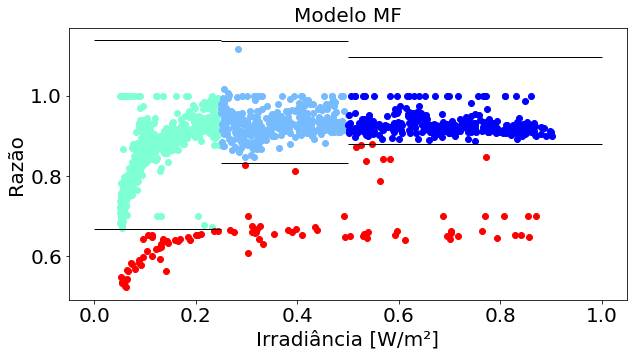

In [83]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df2_MF_faixa1_NF[IRR],df2_MF_faixa1_NF['P/Pac'], color = 'aquamarine')
plt.scatter(df2_MF_faixa1_F[IRR],df2_MF_faixa1_F['P/Pac'], color = 'red')
plt.subplot().hlines(y=(media_faixa1_MF + 3*dp_faixa1_MF), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_MF - 3*dp_faixa1_MF), xmin=0, xmax=0.250, linewidth=1, color='black')

plt.scatter(df2_MF_faixa2_NF[IRR],df2_MF_faixa2_NF['P/Pac'], color = 'xkcd:sky blue')
plt.scatter(df2_MF_faixa2_F[IRR],df2_MF_faixa2_F['P/Pac'], color = 'red')
plt.subplot().hlines(y=(media_faixa2_MF + 3*dp_faixa2_MF), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_MF - 3*dp_faixa2_MF), xmin=0.250, xmax=0.5, linewidth=1, color='black')

plt.scatter(df2_MF_faixa3_NF[IRR],df2_MF_faixa3_NF['P/Pac'], color = 'blue')
plt.scatter(df2_MF_faixa3_F[IRR],df2_MF_faixa3_F['P/Pac'], color = 'red')
plt.subplot().hlines(y=(media_faixa3_MF + 3*dp_faixa3_MF), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_MF - 3*dp_faixa3_MF), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo MF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")

plt.savefig('images/resultadosMFdeteccaofaixa1.png', bbox_inches="tight")
plt.show()

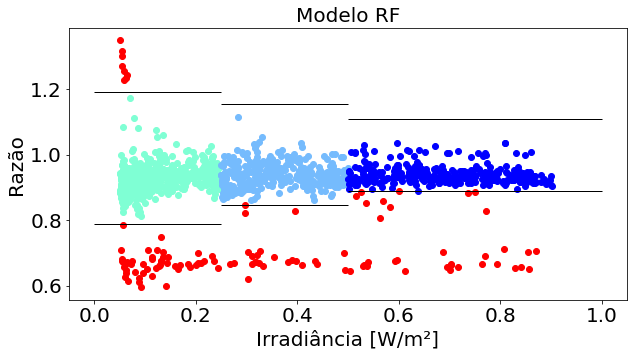

In [84]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df2_RF_faixa1_NF[IRR],df2_RF_faixa1_NF['P/RF_Faixa1'], color = 'aquamarine')
plt.scatter(df2_RF_faixa1_F[IRR],df2_RF_faixa1_F['P/RF_Faixa1'], color = 'red')
plt.subplot().hlines(y=(media_faixa1_OE + 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_OE - 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')

plt.scatter(df2_RF_faixa2_NF[IRR],df2_RF_faixa2_NF['P/RF_Faixa2'], color = 'xkcd:sky blue')
plt.scatter(df2_RF_faixa2_F[IRR],df2_RF_faixa2_F['P/RF_Faixa2'], color = 'red')
plt.subplot().hlines(y=(media_faixa2_OE + 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_OE - 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')

plt.scatter(df2_RF_faixa3_NF[IRR],df2_RF_faixa3_NF['P/RF_Faixa3'], color = 'blue')
plt.scatter(df2_RF_faixa3_F[IRR],df2_RF_faixa3_F['P/RF_Faixa3'], color = 'red')
plt.subplot().hlines(y=(media_faixa3_OE + 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_OE - 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo RF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosRFdeteccaofaixa1.png', bbox_inches="tight")
plt.show()

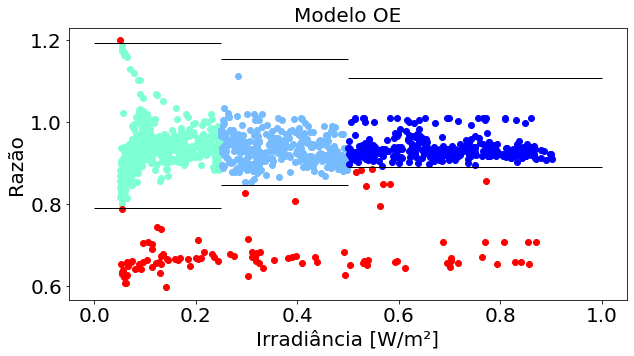

In [85]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df2_OE_faixa1_NF[IRR],df2_OE_faixa1_NF['P/OE_Faixa1'], color = 'aquamarine')
plt.scatter(df2_OE_faixa1_F[IRR],df2_OE_faixa1_F['P/OE_Faixa1'], color = 'red')
plt.subplot().hlines(y=(media_faixa1_OE + 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_OE - 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')

plt.scatter(df2_OE_faixa2_NF[IRR],df2_OE_faixa2_NF['P/OE_Faixa2'], color = 'xkcd:sky blue')
plt.scatter(df2_OE_faixa2_F[IRR],df2_OE_faixa2_F['P/OE_Faixa2'], color = 'red')
plt.subplot().hlines(y=(media_faixa2_OE + 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_OE - 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')

plt.scatter(df2_OE_faixa3_NF[IRR],df2_OE_faixa3_NF['P/OE_Faixa3'], color = 'blue')
plt.scatter(df2_OE_faixa3_F[IRR],df2_OE_faixa3_F['P/OE_Faixa3'], color = 'red')
plt.subplot().hlines(y=(media_faixa3_OE + 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_OE - 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo OE', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosOEdeteccaofaixa1.png', bbox_inches="tight")
plt.show()

### Imprimindo somente as falhas verificadas "visualmente"

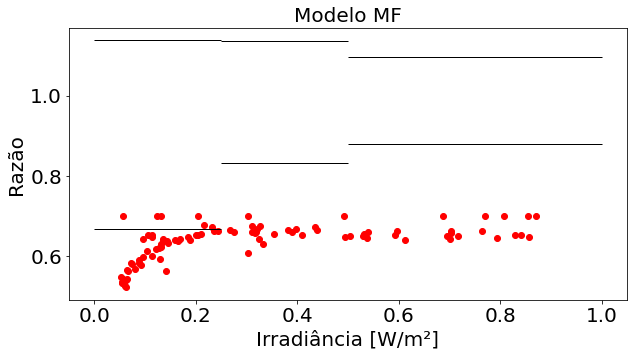

In [86]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df_global_f_conhecidas[IRR],df_global_f_conhecidas['P/Pac'], color = 'red')
plt.subplot().hlines(y=(media_faixa1_MF + 3*dp_faixa1_MF), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_MF - 3*dp_faixa1_MF), xmin=0, xmax=0.250, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa2_MF + 3*dp_faixa2_MF), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_MF - 3*dp_faixa2_MF), xmin=0.250, xmax=0.5, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa3_MF + 3*dp_faixa3_MF), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_MF - 3*dp_faixa3_MF), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo MF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosMFfalhasfs.png', bbox_inches="tight")
plt.show()

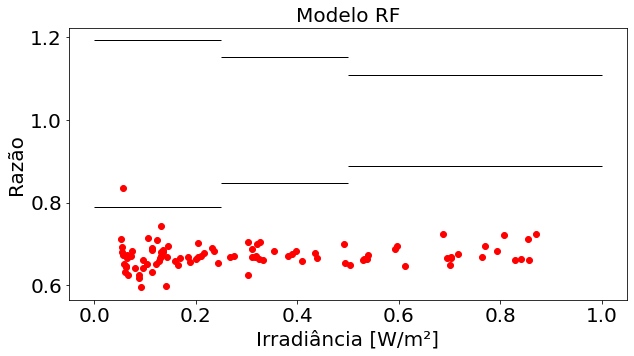

In [87]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df_global_f_conhecidas[IRR],df_global_f_conhecidas['P/RF_Global'], color = 'red')
plt.subplot().hlines(y=(media_faixa1_OE + 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_OE - 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa2_OE + 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_OE - 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa3_OE + 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_OE - 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo RF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosRFfalhasfs.png', bbox_inches="tight")
plt.show()


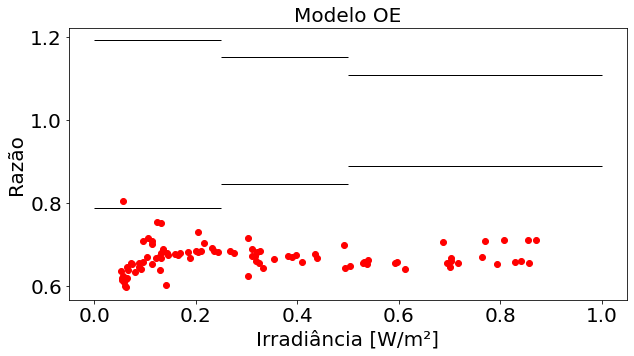

In [88]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df_global_f_conhecidas[IRR],df_global_f_conhecidas['P/OE_Global'], color = 'red')
plt.subplot().hlines(y=(media_faixa1_OE + 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_OE - 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa2_OE + 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_OE - 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa3_OE + 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_OE - 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo OE', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosOEfalhasfs.png', bbox_inches="tight")
plt.show()


### Visualizando as não falhas

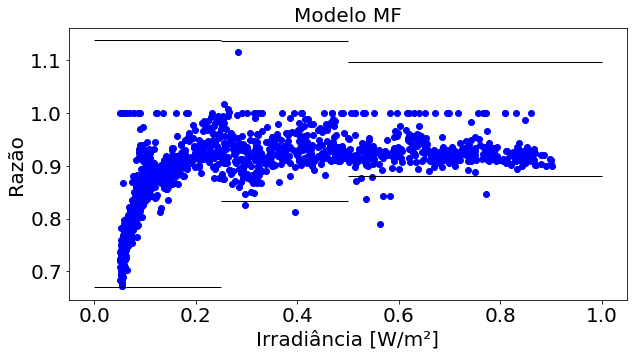

In [89]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df_global_nf_conhecidas[IRR],df_global_nf_conhecidas['P/Pac'], color = 'blue')
plt.subplot().hlines(y=(media_faixa1_MF + 3*dp_faixa1_MF), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_MF - 3*dp_faixa1_MF), xmin=0, xmax=0.250, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa2_MF + 3*dp_faixa2_MF), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_MF - 3*dp_faixa2_MF), xmin=0.250, xmax=0.5, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa3_MF + 3*dp_faixa3_MF), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_MF - 3*dp_faixa3_MF), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo MF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosMFnaofalhasfs.png', bbox_inches="tight")
plt.show()


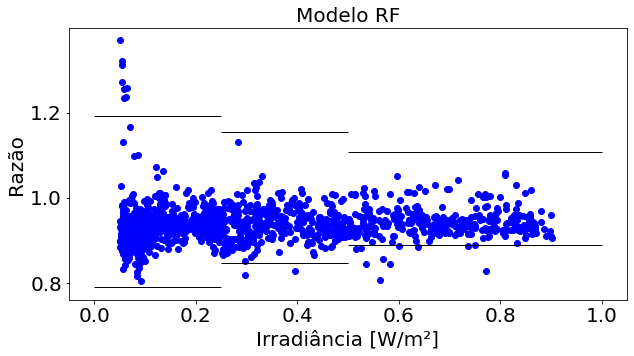

In [90]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df_global_nf_conhecidas[IRR],df_global_nf_conhecidas['P/RF_Global'], color = 'blue')
plt.subplot().hlines(y=(media_faixa1_OE + 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_OE - 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa2_OE + 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_OE - 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa3_OE + 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_OE - 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo RF', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosRFnaofalhasfs.png', bbox_inches="tight")
plt.show()

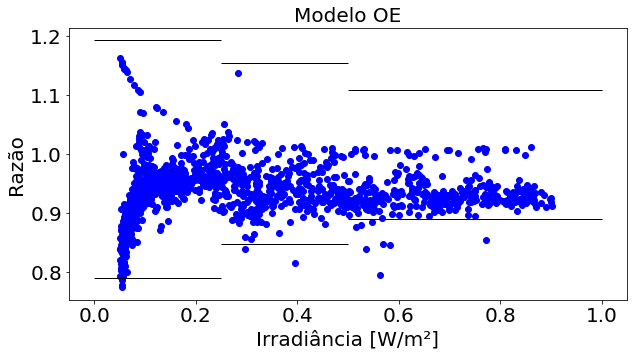

In [91]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(df_global_nf_conhecidas[IRR],df_global_nf_conhecidas['P/OE_Global'], color = 'blue')
plt.subplot().hlines(y=(media_faixa1_OE + 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa1_OE - 3*dp_faixa1_OE), xmin=0, xmax=0.250, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa2_OE + 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa2_OE - 3*dp_faixa2_OE), xmin=0.250, xmax=0.5, linewidth=1, color='black')


plt.subplot().hlines(y=(media_faixa3_OE + 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')
plt.subplot().hlines(y=(media_faixa3_OE - 3*dp_faixa3_OE), xmin=0.5,xmax = 1, linewidth=1, color='black')

plt.title('Modelo OE', fontsize = '20')
plt.xlabel("Irradiância [W/m²]")
plt.ylabel("Razão")
plt.savefig('images/resultadosOEnaofalhasfs.png', bbox_inches="tight")
plt.show()


### Falsos positivos e negativos somados das três faixas

In [92]:
# Somando falsos negativos
fn_mf_faixa123 = fn_mf_faixa1 + fn_mf_faixa2 + fn_mf_faixa3
fn_rf_faixa123 = fn_rf_faixa1 + fn_rf_faixa2 + fn_rf_faixa3
fn_oe_faixa123 = fn_oe_faixa1 + fn_oe_faixa2 + fn_oe_faixa3
# Somando falsos positivos
fp_mf_faixa123 = fp_mf_faixa1 + fp_mf_faixa2 + fp_mf_faixa3
fp_rf_faixa123 = fp_rf_faixa1 + fp_rf_faixa2 + fp_rf_faixa3
fp_oe_faixa123 = fp_oe_faixa1 + fp_oe_faixa2 + fp_oe_faixa3
# Somando true negativos
tn_mf_faixa123 = tn_mf_faixa1 + tn_mf_faixa2 + tn_mf_faixa3
tn_rf_faixa123 = tn_rf_faixa1 + tn_rf_faixa2 + tn_rf_faixa3
tn_oe_faixa123 = tn_oe_faixa1 + tn_oe_faixa2 + tn_oe_faixa3
# Somando true positivos
tp_mf_faixa123 = tp_mf_faixa1 + tp_mf_faixa2 + tp_mf_faixa3
tp_rf_faixa123 = tp_rf_faixa1 + tp_rf_faixa2 + tp_rf_faixa3
tp_oe_faixa123 = tp_oe_faixa1 + tp_oe_faixa2 + tp_oe_faixa3



print("______________________ TOTAL DE FN, FP, TN e TP NOS MODELOS DENTRO DAS FAIXAS SEPARADAS____________")
print(" FN MF = ",fn_mf_faixa123, " FP MF = ",fp_mf_faixa123, " TN MF = ",tn_mf_faixa123, " TP MF = ",tp_mf_faixa123)
print(" FN RF = ",fn_rf_faixa123, " FP RF = ",fp_rf_faixa123, " TN RF = ",tn_rf_faixa123, " TP RF = ",tp_rf_faixa123)
print(" FN OE = ",fn_oe_faixa123, " FP OE = ",fp_oe_faixa123, " TN OE = ",tn_oe_faixa123, " TP OE = ",tp_oe_faixa123)

______________________ TOTAL DE FN, FP, TN e TP NOS MODELOS DENTRO DAS FAIXAS SEPARADAS____________
 FN MF =  6  FP MF =  10  TN MF =  88  TP MF =  1302
 FN RF =  1  FP RF =  22  TN RF =  93  TP RF =  1290
 FN OE =  1  FP OE =  12  TN OE =  93  TP OE =  1300


In [93]:
# Modelo MF

# Precisão
mf_fs_precision = tp_mf_faixa123 / (tp_mf_faixa123 + fp_mf_faixa123) * 100

#Acurácia
mf_fs_acurracy = (tp_mf_faixa123 + tn_mf_faixa123) / (tp_mf_faixa123 + tn_mf_faixa123 + fp_mf_faixa123 + fn_mf_faixa123) * 100

#Especificidade
mf_fs_especi = tn_mf_faixa123 / (tn_mf_faixa123 + fp_mf_faixa123) * 100
#Recall
mf_fs_recall = tp_mf_faixa123 / (tp_mf_faixa123 + fn_mf_faixa123) * 100


print('Modelo MF nas faixas separadas teve:')
print('Precisão = ', mf_fs_precision)
print('Acurácia = ', mf_fs_acurracy)
print('Especificidade = ', mf_fs_especi)
print('Recall = ', mf_fs_recall)


Modelo MF nas faixas separadas teve:
Precisão =  99.23780487804879
Acurácia =  98.86201991465148
Especificidade =  89.79591836734694
Recall =  99.54128440366972


In [94]:
# Modelo OE

# Precisão
oe_fs_precision = tp_oe_faixa123 / (tp_oe_faixa123 + fp_oe_faixa123) * 100

#Acurácia
oe_fs_acurracy = (tp_oe_faixa123 + tn_oe_faixa123) / (tp_oe_faixa123 + tn_oe_faixa123 + fp_oe_faixa123 + fn_oe_faixa123) * 100

#Especificidade
oe_fs_especi = tn_oe_faixa123 / (tn_oe_faixa123 + fp_oe_faixa123) * 100
#Recall
oe_fs_recall = tp_oe_faixa123 / (tp_oe_faixa123 + fn_oe_faixa123) * 100


print('Modelo OE nas faixas separadas teve:')
print('Precisão = ', oe_fs_precision)
print('Acurácia = ', oe_fs_acurracy)
print('Especificidade = ', oe_fs_especi)
print('Recall = ', oe_fs_recall)


Modelo OE nas faixas separadas teve:
Precisão =  99.08536585365853
Acurácia =  99.07539118065434
Especificidade =  88.57142857142857
Recall =  99.92313604919293


In [95]:
# Modelo RF
# Precisão
rf_fs_precision = tp_rf_faixa123 / (tp_rf_faixa123 + fp_rf_faixa123) * 100
#Acurácia
rf_fs_acurracy = (tp_rf_faixa123 + tn_rf_faixa123) / (tp_rf_faixa123 + tn_rf_faixa123 + fp_rf_faixa123 + fn_rf_faixa123) * 100
#Especificidade
rf_fs_especi = tn_rf_faixa123 / (tn_rf_faixa123 + fp_rf_faixa123) * 100
#Recall
rf_fs_recall = tp_rf_faixa123 / (tp_rf_faixa123 + fn_rf_faixa123) * 100


print('Modelo RF nas faixas separadas teve:')
print('Precisão = ', rf_fs_precision)
print('Acurácia = ', rf_fs_acurracy)
print('Especificidade = ', rf_fs_especi)
print('Recall = ', rf_fs_recall)

Modelo RF nas faixas separadas teve:
Precisão =  98.32317073170732
Acurácia =  98.36415362731152
Especificidade =  80.8695652173913
Recall =  99.92254066615027
